In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications import vgg16
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
num_classes = 10

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 3)

In [ ]:
x_train = tf.image.resize(x_train, [36,36])
x_test = tf.image.resize(x_test, [36,36])

In [ ]:
x_train.shape

TensorShape([60000, 36, 36, 3])

In [ ]:
x_train = x_train.numpy()
x_test = x_test.numpy()

In [ ]:
x_train.shape

(60000, 36, 36, 3)

In [ ]:
x_train = vgg16.preprocess_input(x_train)
x_test = vgg16.preprocess_input(x_test)

In [ ]:
x_train.shape

(60000, 36, 36, 3)

In [ ]:
x_train = np.array(x_train, dtype = 'float32') / 255.0
x_test = np.array(x_test, dtype = 'float32') / 255.0

In [ ]:
x_train.shape

(60000, 36, 36, 3)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
base_model = vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=tf.keras.Input(shape=(36,36,3)),
    input_shape=x_train[0].shape,
    # classes=num_classes,
    # classifier_activation="softmax",
)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 36, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 36, 36, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 36, 36, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 18, 18, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 18, 18, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 18, 18, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 9, 9, 128)         0     

In [ ]:
nL = len(base_model.layers)
print(nL)

19


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = base_model.input, outputs = output)

In [ ]:
for layer in base_model.layers[:nL - 1]:
    layer.trainable = False

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 36, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 36, 36, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 36, 36, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 18, 18, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 18, 18, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 18, 18, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 9, 9, 128)         0     

In [ ]:
batch_size = 64
epochs = 5

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs,
                    verbose=1, validation_data = (x_test, y_test))

Epoch 1/5
938/938 [==============================] - 851s 906ms/step - loss: 0.3368 - accuracy: 0.8979 - val_loss: 0.1380 - val_accuracy: 0.9585
Epoch 2/5
938/938 [==============================] - 851s 907ms/step - loss: 0.1300 - accuracy: 0.9591 - val_loss: 0.1053 - val_accuracy: 0.9669
Epoch 3/5
938/938 [==============================] - 851s 907ms/step - loss: 0.1062 - accuracy: 0.9668 - val_loss: 0.0982 - val_accuracy: 0.9668
Epoch 4/5
938/938 [==============================] - 848s 904ms/step - loss: 0.0936 - accuracy: 0.9696 - val_loss: 0.0834 - val_accuracy: 0.9744
Epoch 5/5
938/938 [==============================] - 846s 903ms/step - loss: 0.0878 - accuracy: 0.9719 - val_loss: 0.1170 - val_accuracy: 0.9593


In [ ]:
history = history.history

In [ ]:
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()

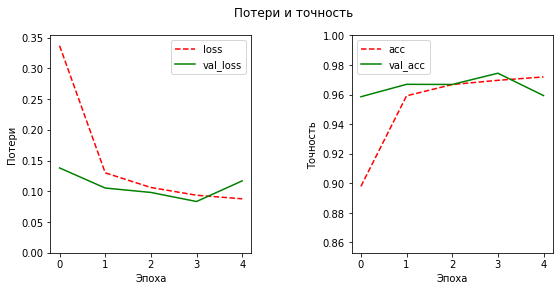

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()

In [ ]:
pred_1 = model.predict(x_train)
pred_1 = np.argmax(pred_1, axis=1)

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_train = np.argmax(y_train, axis=1)

In [ ]:
y_train[0]

5

In [ ]:
acc_1 = y_train[y_train == pred_1].shape[0] / y_train.shape[0]

In [ ]:
print(acc_1 * 100)

96.44833333333334


In [ ]:
pred_2 = model.predict(x_test)
pred_2 = np.argmax(pred_2, axis=1)

In [ ]:
acc_2 = y_test[y_test == pred_2].shape[0] / y_test.shape[0]


In [ ]:
print(acc_2 * 100)

95.93


In [ ]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [ ]:
print(y_train[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [ ]:
y_test_classes = [0] * num_classes
y_test_true = [0] * num_classes
for i in range(y_test.shape[0]):
  y_test_classes[y_test[i]] += 1
  if y_test[i] == pred_2[i]:
    y_test_true[y_test[i]] += 1

In [ ]:
y_test_classes

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [ ]:
y_test_true

[968, 1123, 939, 907, 972, 858, 944, 974, 943, 965]

In [ ]:
print("Test: \n")
for i in range(num_classes):
  print("acc ", i, " - ", format((y_test_true[i] * 100) / y_test_classes[i], '.2f') )

Test: 

acc  0  -  98.78
acc  1  -  98.94
acc  2  -  90.99
acc  3  -  89.80
acc  4  -  98.98
acc  5  -  96.19
acc  6  -  98.54
acc  7  -  94.75
acc  8  -  96.82
acc  9  -  95.64


In [ ]:
y_train_classes = [0] * num_classes
y_train_true = [0] * num_classes
for i in range(y_train.shape[0]):
  y_train_classes[y_train[i]] += 1
  if y_train[i] == pred_1[i]:
    y_train_true[y_train[i]] += 1

In [ ]:
y_train_classes

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [ ]:
y_train_true

[5891, 6695, 5457, 5524, 5765, 5259, 5869, 6042, 5683, 5684]

In [ ]:
print("Train: \n")
for i in range(num_classes):
  print("acc ", i, " - ", format((y_train_true[i] * 100) / y_train_classes[i], '.2f') )

Train: 

acc  0  -  99.46
acc  1  -  99.30
acc  2  -  91.59
acc  3  -  90.10
acc  4  -  98.68
acc  5  -  97.01
acc  6  -  99.17
acc  7  -  96.44
acc  8  -  97.13
acc  9  -  95.55
